In [1]:
from google.oauth2 import service_account
import pandas as pd
import gspread
import json
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import textwrap
import google.generativeai as genai
from IPython.display import Markdown
from PIL import Image
from io import BytesIO

In [2]:
#Import the json data
load_dotenv()
google_json = os.getenv('GOOGLE_JSON')

In [3]:
service_account_info = json.loads(google_json)
credentials = service_account.Credentials.from_service_account_info(service_account_info)

In [4]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds_with_scope = credentials.with_scopes(scope)

In [5]:
client = gspread.authorize(creds_with_scope)

In [6]:
spreadsheet = client.open_by_url(os.getenv('GOOGLE_SHEET'))

In [7]:
worksheet = spreadsheet.get_worksheet(0)

In [8]:
records_data = worksheet.get_all_records()

In [9]:
records_df = pd.DataFrame.from_dict(records_data)

In [10]:
records_df['K/D Ratio'] = round(records_df.Kills / records_df.Deaths, 1)
records_df

,Date time,Kills,Deaths,Accuracy,Shots Fired,Shots Hit,Damage Dealt,Damage Taken,Headshot Kills,Notes,K/D Ratio
0,23/02/2024 15:40,26,10,49.65,441,219,9206,5252,,,2.6
1,23/02/2024 16:17,23,11,48.80,420,205,8463,4917,,,2.1
2,23/02/2024 16:35,22,14,45.33,450,204,7646,5493,,,1.6
3,23/02/2024 16:50,25,15,42.60,399,170,7566,5231,,,1.7
4,23/02/2024 17:13,28,14,44.26,436,193,8615,5941,,,2.0
5,23/02/2024 23:17,66,20,43.10,740,319,15396,8348,,Changed to HCS:FFA,3.3
6,24/02/2024 18:09,61,25,42.73,681,291,13331,9140,,First match of the day,2.4
7,24/02/2024 18:26,71,18,42.30,773,327,15292,8232,,,3.9
8,24/02/2024 20:38,77,14,45.66,830,379,16861,7697,,,5.5
9,25/02/2024 21:27,77,19,47.09,688,324,15099,7842,,,4.1


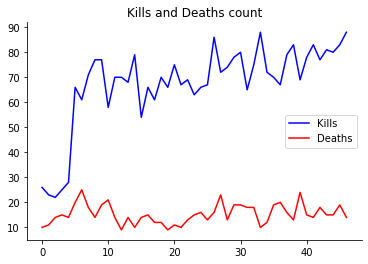

In [11]:
sns.lineplot(data=records_df, x=records_df.index, y='Kills', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Deaths', color='red')
sns.despine(left=False, bottom=False)
plt.title('Kills and Deaths count')
plt.ylabel('')
plt.legend(['Kills', 'Deaths'])

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Kills'], mode='lines+markers', name='Kills', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='#05D9E8')))
fig.update_layout(title='Last Games', hovermode='x', plot_bgcolor='#01012B')

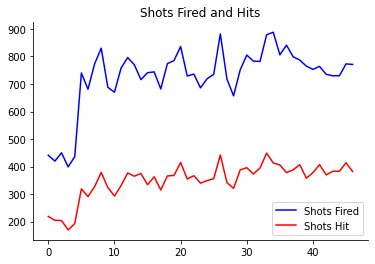

In [13]:
sns.lineplot(data=records_df, x=records_df.index, y='Shots Fired', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Shots Hit', color='red')
sns.despine(left=False, bottom=False)
plt.title('Shots Fired and Hits')
plt.ylabel('')
plt.legend(['Shots Fired', 'Shots Hit'])

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Shots Fired'], mode='lines+markers', name='Shots Fired', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Shots Hit'], mode='lines+markers', name='Shots Hit', line=dict(color='#05D9E8')))
fig.update_layout(title='Shooting', hovermode='x', plot_bgcolor='#01012B')

Text(0, 0.5, '')

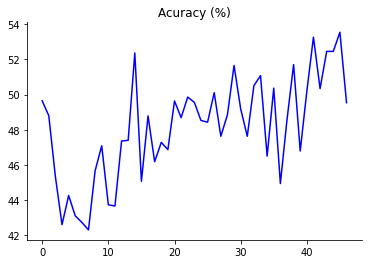

In [15]:
sns.lineplot(data=records_df, x=records_df.index, y='Accuracy', color='blue')
sns.despine(left=False, bottom=False)
plt.title('Acuracy (%)')
plt.ylabel('')

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Accuracy'], mode='lines+markers', name='Accuracy', line=dict(color='#FF2A6D')))
fig.update_layout(title='Accuracy (%)', hovermode='x', plot_bgcolor='#01012B')

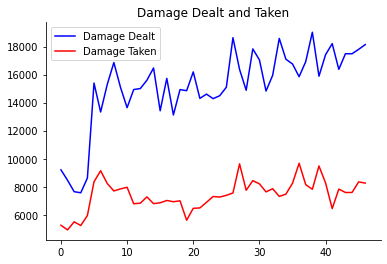

In [17]:
sns.lineplot(data=records_df, x=records_df.index, y='Damage Dealt', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Damage Taken', color='red')
sns.despine(left=False, bottom=False)
plt.title('Damage Dealt and Taken')
plt.ylabel('')
plt.legend(['Damage Dealt', 'Damage Taken'])

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Damage Dealt'], mode='lines+markers', name='Damage Dealt', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Damage Taken'], mode='lines+markers', name='Damage Taken', line=dict(color='#05D9E8')))
fig.update_layout(title='Damage', hovermode='x', plot_bgcolor='#01012B')

Text(0, 0.5, '')

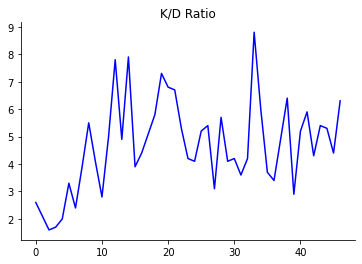

In [19]:
sns.lineplot(data=records_df, x=records_df.index, y='K/D Ratio', color='blue')
sns.despine(left=False, bottom=False)
plt.title('K/D Ratio')
plt.ylabel('')

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['K/D Ratio'], mode='lines+markers', name='K/D Ratio', line=dict(color='#FF2A6D')))
fig.update_layout(title='K/D Ratio', hovermode='x', plot_bgcolor='#01012B')

In [21]:
def to_markdown(text):
    """Function to transform the text generated by AI to markdown

    Args:
        text (str): str text generated by AI

    Returns:
        Markdown: AI Text transformed to markdown
    """
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

In [22]:
#Using API Key to connect with the AI
genai.configure(api_key=os.getenv('GOOGLE_AI_KEY'))

In [23]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [33]:
#Selecting the model
model = genai.GenerativeModel('gemini-1.5-pro-latest')

In [34]:
response = model.generate_content(f"""
Use the following information: {records_df}, also consider that the training sessions used to generate the data are 8 bots against
and the player in a free for all match in Halo Infinite, following Halo Championship Series rules, and perform the following tasks:
1. Perform a general analysis of the data.
2. Extract the dates with the best and worst results.
3. Generate tips that can help the player improve their individually skills.
4. Considering the results obtained, is there any correlation between the data?
5. Can you assume what style of play the player uses and how could it improve individually?
6. How should the player reduce its negative stats without altering the individual playstyle assumed in point 5?
7. Based on point 6, What strategies can the player use within the game to overcome challenges and What resources are available outside the game that can help the player learn and grow?""")
to_markdown(response.text)

>## Halo Infinite Performance Analysis
>
>Let's analyze your Halo Infinite data and see what we can learn:
>
>**1. General Analysis:**
>
>* **Positive:** You consistently achieve high kill counts, demonstrating aggressive gameplay and good map awareness. Your headshot percentage is also decent, indicating good aim.
>* **Areas for Improvement:** Your accuracy hovers around 45-50%, suggesting many shots miss their target. This lowers your efficiency and potentially wastes valuable ammo. Your K/D ratio fluctuates, implying inconsistency. 
>
>**2. Best and Worst Dates:**
>
>* **Best:** 
>    * 27/02/2024 - High kill counts with low deaths, resulting in excellent K/D ratios of 7.8 and 5. 
>    * 07/03/2024 - Another strong day with high kills, respectable accuracy, and culminating in an 8.8 K/D.
>* **Worst:** 
>    * 23/02/2024 -  Low K/D ratios, especially compared to later performances. This could be due to adjusting to the game mode or having an off day.
>    * 22/03/2024 - While you secure good kill counts, the higher death counts suggest struggles against opponents or poor positioning, leading to lower K/D ratios. 
>
>**3. Tips for Improvement:**
>
>* **Accuracy:** Focus on improving shot placement. Spend time in the Academy or custom games practicing against bots. Utilize aiming drills and try adjusting sensitivity settings for optimal control.
>* **Consistency:**  Analyze matches with lower K/D ratios to identify repeated mistakes. Are you dying in specific locations?  Are certain weapons less effective? This will help refine your strategy. 
>* **Map Awareness:** Even with good kill counts, your deaths indicate potential issues with positioning. Utilize radar effectively and be mindful of flanking routes. Watch professional Halo Infinite gameplay to learn advanced positioning techniques. 
>
>**4. Data Correlations:**
>
>* **Kills/Accuracy:**  There isn't a strong direct correlation. Some days you achieve high kills with lower accuracy, suggesting a spray-and-pray approach. Ideally, increasing accuracy should directly result in more efficient kills.
>* **Damage Dealt/Damage Taken:** This connection is more evident. Higher kill games often correlate with higher damage dealt and received, reflecting aggressive gameplay.
>* **K/D Ratio/Accuracy:** Generally, higher accuracy leads to a better K/D ratio, but this isn't always consistent in your data. Improving accuracy is crucial for maximizing your killing potential while minimizing deaths. 
>
>**5. Playstyle and Improvement:**
>
>* **Assumed Playstyle:** You seem to favor an aggressive, kill-focused style, prioritizing engagements over a cautious approach. 
>* **Individual Improvement:**
>    * **Weapon Choice:** Analyze your weapon usage data (not provided here). Are you consistently performing better with certain weapons? Focus on mastering those for maximum impact.
>    * **Engagement Distance:**  Experiment with varying engagement distances.  Learn which weapons are optimal for close, medium, and long-range combat. This will diversify your approach. 
>    * **Movement:** Practice advanced movement techniques like strafing and crouch-spamming to improve your evasiveness during gunfights.
>
>**6. Reducing Negative Stats:**
>
>* **Improve Map Awareness:**  This is key to avoiding unnecessary deaths without drastically changing your playstyle.  Anticipate enemy locations and utilize cover effectively. 
>* **Strategic Retreats:**  Don't be afraid to disengage from unfavorable fights. Live to fight another day!
>* **Grenade Usage:**  Practice using grenades proactively for area denial or flushing out opponents, creating opportunities for kills while minimizing risk.
>
>**7. In-Game Strategies and External Resources:**
>
>* **In-Game:**
>    * **Power Weapon Control:** Prioritize acquiring power weapons like the Rocket Launcher or Sniper Rifle. These give you a significant advantage. 
>    * **Teamwork (if applicable):** In team-based modes, communicate effectively with teammates. Coordinate attacks and cover each other.
>* **External Resources:**
>    * **Halo Infinite Pro Gameplay:** Watching professional players provides valuable insights into positioning, advanced techniques, and game sense.
>    * **Training Modes:** Utilize the Academy and custom games for focused practice on weaknesses identified from your data analysis.
>    * **Online Communities:** Join Halo Infinite forums or communities to discuss strategies, share experiences, and learn from other players. 
>    * **Aim Trainers:** Utilize third-party aim trainers to specifically hone your accuracy and reaction time.
>
>By consistently applying these tips and resources, you can improve your Halo Infinite skills, refine your playstyle, and dominate the competition! 


In [26]:
def last_matchs_plot(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date time'], y=data['Kills'], mode='lines+markers', name='Kills', line=dict(color='#FF2A6D')))
    fig.add_trace(go.Scatter(x=data['Date time'], y=data['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='#05D9E8')))
    fig.update_layout(title='Last Games', hovermode='x', plot_bgcolor='#01012B', width=1200, height=660)
    return fig

In [27]:
def kd_ratio_plot(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date time'], y=data['K/D Ratio'], mode='lines+markers', name='K/D Ratio', line=dict(color='#FF2A6D')))
    fig.update_layout(title='K/D Ratio', hovermode='x', plot_bgcolor='#01012B', width=1200, height=660)
    return fig

In [28]:
def create_image_from_plot(plot):
   """
   Creates a PIL Image object from a plot object without using temporary files.

   Args:
       plot: The plot object to convert to an image.

   Returns:
       The PIL Image object representing the plot.
   """

   img_bytes = plot.to_image(format='png')
   img_data = BytesIO(img_bytes)
   img = Image.open(img_data)
   return img

plot = create_image_from_plot(kd_ratio_plot(records_df))

In [35]:

img_model = genai.GenerativeModel('gemini-1.5-pro-latest')
promt = """
Use the plot and make an analysis about the data shown in it, using the next context:
            1. The data is generated after a training match between a human and 8 bots in Halo infinite, following Halo Championship
            series rules in a free for all match
            2.  The focus of the training is to improve the skills of the player
            3. The plot contains the results of all matches played so far
            4. Have in mind that the first 5 matches were played against 4 bots instead of 8
            5. Advice the player how to improve his skills based on the data analyzed
            Also, do not calculate averages to do the analysis
"""
response = img_model.generate_content([promt, plot], stream=True)
response.resolve()
#to_markdown(response.text)
for candidate in response.candidates:
    answer = [part.text for part in candidate.content.parts]
for i in answer:
    print(i)

Analyzing this K/D ratio plot without using averages requires a keen eye for trends and individual performance spikes. Here's a breakdown:

**Initial Assessment:**

* **Early Volatility:** The first few matches showcase fluctuating performance, with a noticeable dip in the second match followed by a spike in the fourth. This suggests the player was still adapting to the game's mechanics and finding their rhythm. 
* **First Peak:** Around match number 7, there's a significant peak, indicating a period of strong performance. This could be attributed to grasping core concepts or a particular playstyle working effectively.
* **Second Peak:** Around match 15, another peak emerges, even higher than the first.  The player likely refined their strategy, improved map awareness, or honed specific weapon skills.
* **Increased Opponents, Increased Volatility:** After match 20, where the player likely started facing 8 bots instead of 4, there's more volatility in the K/D ratio. Some matches are exc

In [36]:
try:
    img_model = genai.GenerativeModel('emini-1.5-pro-latest')
    promt = """
    Use the plot and make an analysis about the data shown in it, using the next context:
            1. The data is generated after a training match between a human and 8 bots in Halo infinite, following Halo Championship
            series rules in a free for all match
            2.  The focus of the training is to improve the skills of the player
            3. The plot contains the results of all matches played so far
            4. Have in mind that the first 5 matches were played against 4 bots instead of 8
            5. Advice the player how to improve his skills based on the data analyzed
            Also, do not calculate averages to do the analysis
    """
    response = img_model.generate_content([promt, plot], stream=True)
    response.resolve()
    to_markdown(response.text)
except Exception as e:
    img_model = genai.GenerativeModel('gemini-pro-vision')
    promt = """
    Use the plot and make an analysis about the data shown in it, using the next context:
            1. The data is generated after a training match between a human and 8 bots in Halo infinite, following Halo Championship
            series rules in a free for all match
            2.  The focus of the training is to improve the skills of the player
            3. The plot contains the results of all matches played so far
            4. Have in mind that the first 5 matches were played against 4 bots instead of 8
            5. Advice the player how to improve his skills based on the data analyzed
            Also, do not calculate averages to do the analysis
    """
    response = img_model.generate_content([promt, plot], stream=True)
    response.resolve()
    for candidate in response.candidates:
        answer = [part.text for part in candidate.content.parts]
    for i in answer:
        print(i)

 Analyzing the data, it is clear that the player has improved their skills over time. The K/D ratio has increased from 2.0 in the first match to 6.0 in the most recent match. This is a significant improvement, and it is likely due to the player's increased experience and skill.

There are a few things that the player can do to continue to improve their skills. First, they should focus on improving their aim. This can be done by practicing in the training mode or by playing against other players. Second, the player should focus on learning the maps and understanding the different strategies that can be used on each map. Third, the player should focus on improving their communication skills. This can be done by practicing with teammates or by watching professional matches.

By following these tips, the player can continue to improve their skills and become a better Halo player.
